In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from scipy.stats import shapiro     #normality test
from yellowbrick.regressor import ResidualsPlot 
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge # for ridge regression
from sklearn.linear_model import Lasso # for lasso regression

In [68]:
#!pip install yellowbrick

### Context
#### The original dataset contains 414 explanatory variables describing 7 aspects of real estate:

**X1 transaction date (numeric)**

**X2 house age (numeric, in year)**

**X3 distance to the nearest MRT station (numeric)**

**X4 number of convenience stores (numeric)**

**X5 latitude (numeric)**

**X6 longitude (numeric)**

**Y house price of unit area (numeric)**

**We are required to model the price of real estate with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.**

In [69]:
df = pd.read_csv("Real estate.csv")
df.round(decimals=2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.92,32.0,84.88,10,24.98,121.54,37.9
1,2,2012.92,19.5,306.59,9,24.98,121.54,42.2
2,3,2013.58,13.3,561.98,5,24.99,121.54,47.3
3,4,2013.50,13.3,561.98,5,24.99,121.54,54.8
4,5,2012.83,5.0,390.57,5,24.98,121.54,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.00,13.7,4082.02,0,24.94,121.50,15.4
410,411,2012.67,5.6,90.46,9,24.97,121.54,50.0
411,412,2013.25,18.8,390.97,7,24.98,121.54,40.6
412,413,2013.00,8.1,104.81,5,24.97,121.54,52.5


In [70]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [71]:
#checking null values
df.isnull().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

In [72]:
#checking data types
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

### There are four assumptions associated with a linear regression model:

**Linearity: The relationship between X and the mean of Y is linear.**

**Homoscedasticity: The variance of residual is the same for any value of X.**

**Independence: Observations are independent of each other.**

**Normality: For any fixed value of X, Y is normally distributed.**


### So I'm gonna check that assumptions below.Lets see...

### Checking outliers in data

**linear regression needs the relationship between the independent and dependent variables to be linear. It is also important to check for outliers since linear regression is sensitive to outlier effects.**

**Using Boxplot**

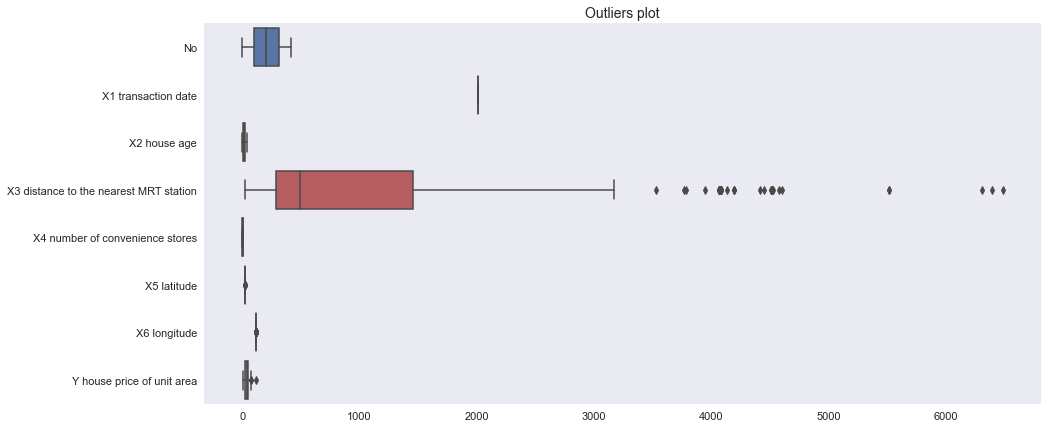

In [73]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']= (18, 11)
fig = plt.figure(figsize = (15, 7))
ax = sns.boxplot(data = df, orient='h')
plt.title('Outliers plot', fontsize = 14)
plt.show()

**A part from feature "X3 distance to the nearest MRT station", no other feature have outliers.**

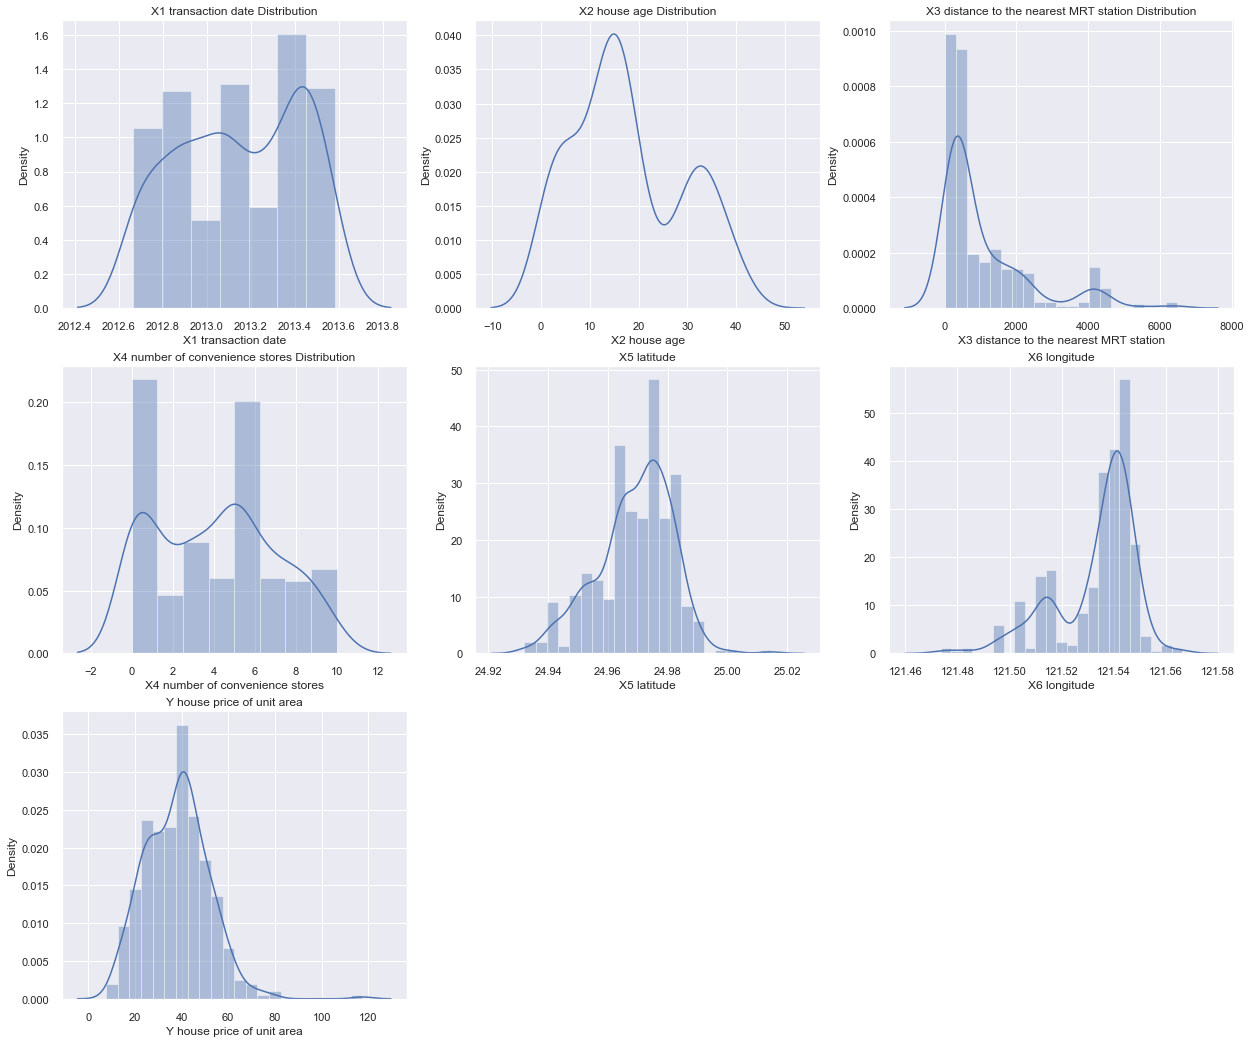

In [74]:
sns.set(rc={"figure.figsize": (21, 18)})
x1 = df["X1 transaction date"]
x2 = df["X2 house age"]
x3 = df["X3 distance to the nearest MRT station"]
x4 = df["X4 number of convenience stores"]
x5 = df["X5 latitude"]
x6 = df["X6 longitude"]
y = df["Y house price of unit area"]

subplot(3,3,1)
ax = sns.distplot(x1)
plt.title("X1 transaction date Distribution")

subplot(3,3, 2)
ax = sns.distplot(x2, rug=False, hist=False)
plt.title("X2 house age Distribution")

subplot(3,3,3)
ax = sns.distplot(x3, vertical=False)
plt.title("X3 distance to the nearest MRT station Distribution")

subplot(3,3,4)
ax = sns.distplot(x4, color="b")
plt.title("X4 number of convenience stores Distribution")

subplot(3,3,5)
ax = sns.distplot(x5, color="b")
plt.title("X5 latitude")

subplot(3,3,6)
ax = sns.distplot(x6, color="b")
plt.title("X6 longitude")

subplot(3, 3, 7)
ax = sns.distplot(y, color="b")
plt.title("Y house price of unit area")

plt.show()

**nsights:**

**X3.distance.to.the.nearest.MRT.station has a highly skewed distribution (mean = 1083.885689, median = 492.2313, skew = 1.8750920). It's also right-skewed, the distance to the nearest MRT looks like less than 2000.**

**In skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely effect the model's performance especially regression based model. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will be shown in the following section.**

**Applying log transforn mrt station feature coz is skewed**

In [75]:
df['log_MRT station'] = np.log(df['X3 distance to the nearest MRT station'])
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_MRT station
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,4.441225
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,5.725527
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,6.331474
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6.331474
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,5.967603


In [76]:
df.drop(columns = 'X3 distance to the nearest MRT station', axis = 1, inplace=True)
df.head()

,No,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_MRT station
0,1,2012.917,32.0,10,24.98298,121.54024,37.9,4.441225
1,2,2012.917,19.5,9,24.98034,121.53951,42.2,5.725527
2,3,2013.583,13.3,5,24.98746,121.54391,47.3,6.331474
3,4,2013.500,13.3,5,24.98746,121.54391,54.8,6.331474
4,5,2012.833,5.0,5,24.97937,121.54245,43.1,5.967603


In [77]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'log_MRT station'],
      dtype='object')

In [78]:
df = df[df.columns[[0, 1, 2, 7, 3, 4, 5, 6]]]

df.head()


,No,X1 transaction date,X2 house age,log_MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,4.441225,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,5.725527,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,6.331474,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,6.331474,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,5.967603,5,24.97937,121.54245,43.1



### Checking Multi-colinearty using heatmap 

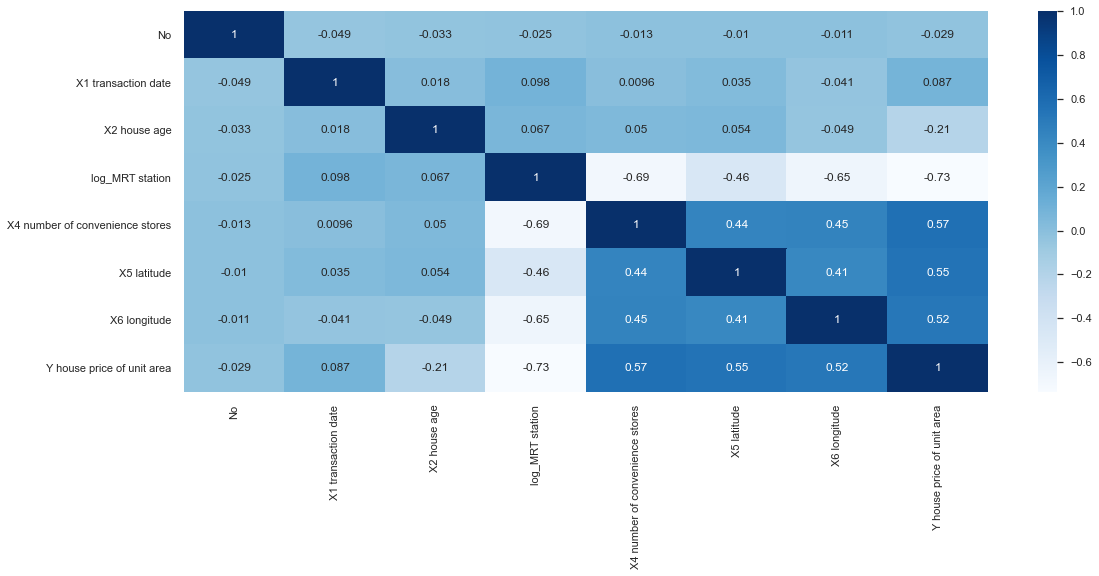

In [79]:
f= plt.figure(figsize=(18,7))
corr = df.corr()
ax = sns.heatmap(corr, cmap = 'Blues', annot= True)

**Insights:**

**Altogether, there are 3 numeric variables with a correlation of at least 0.5 with Y.house.price.of.unit.area. Most of these 4 correlations are positive except for the correlation between X3.distance.to.the.nearest.MRT.station and Y.house.price.of.unit.area (-0.67).**

**The correlation between X2.house.age and Y.house.price.of.unit.area is weak(-0.21). X1.transaction.date and Y.house.price.of.unit.area are almost unrelated(0.08).**

**It also becomes clear the multicollinearity is an issue. For example: the correlation between X3.distance.to.the.nearest.MRT.station and X4.number.of.convenience.stores is high (-0.6) or between X3 and X6.longitude(-0.81), and all 3 variables have similar (high) correlations with Y.**

### The correlation between variables will be more clearly shown in the scatter graph below:

**Checking correlation for Independent features with Target Feature:**

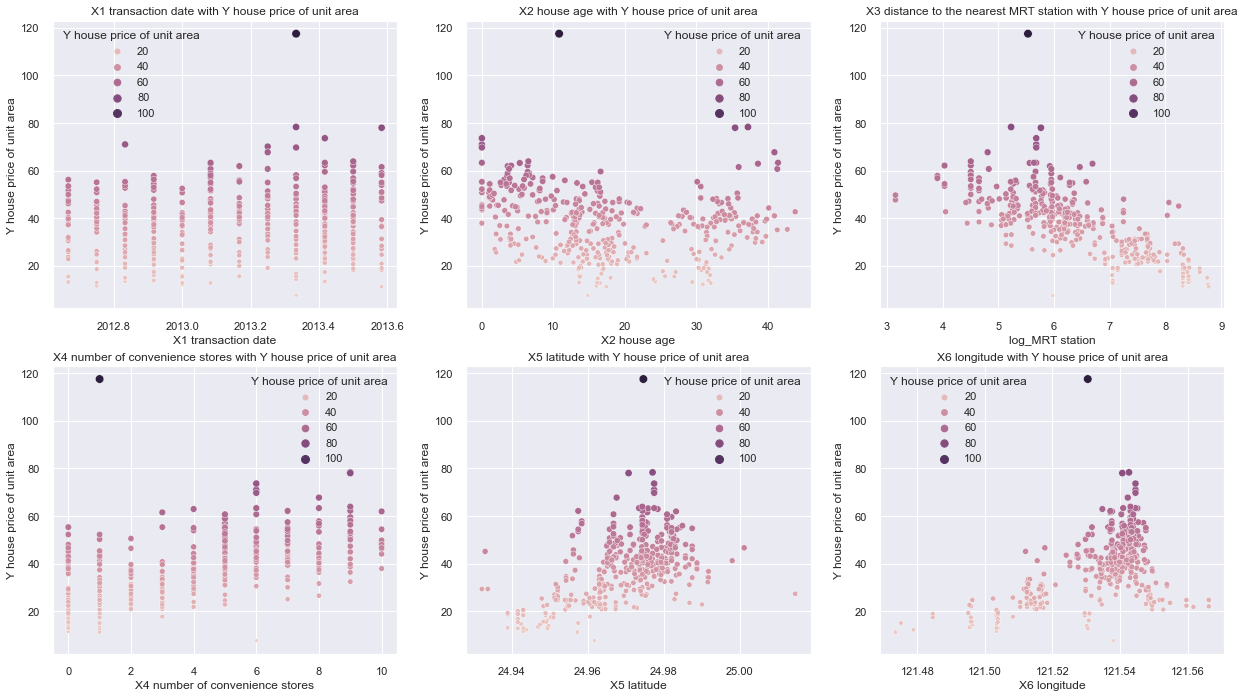

In [80]:
sns.set(rc={"figure.figsize": (21, 18)})
x1 = df["X1 transaction date"]
x2 = df["X2 house age"]
x3 = df["log_MRT station"]
x4 = df["X4 number of convenience stores"]
x5 = df["X5 latitude"]
x6 = df["X6 longitude"]
y = df["Y house price of unit area"]

subplot(3,3,1)
ax = sns.scatterplot(data=df, x=x1, y=y, hue="Y house price of unit area", size="Y house price of unit area")
plt.title("X1 transaction date with Y house price of unit area")

subplot(3,3, 2)
ax = sns.scatterplot(data=df, x=x2, y=y, hue="Y house price of unit area", size="Y house price of unit area")
plt.title("X2 house age with Y house price of unit area")

subplot(3,3,3)
ax = sns.scatterplot(data=df, x=x3, y=y, hue="Y house price of unit area", size="Y house price of unit area")
plt.title("X3 distance to the nearest MRT station with Y house price of unit area")

subplot(3,3,4)
ax = sns.scatterplot(data=df, x=x4, y=y, hue="Y house price of unit area", size="Y house price of unit area")
plt.title("X4 number of convenience stores with Y house price of unit area")

subplot(3,3,5)
ax = sns.scatterplot(data=df, x=x5, y=y, hue="Y house price of unit area", size="Y house price of unit area")
plt.title("X5 latitude with Y house price of unit area")

subplot(3,3,6)
ax = sns.scatterplot(data=df, x=x6, y=y, hue="Y house price of unit area", size="Y house price of unit area")
plt.title("X6 longitude with Y house price of unit area")



plt.show()

### Also checking for independent features which are correlated with each other:

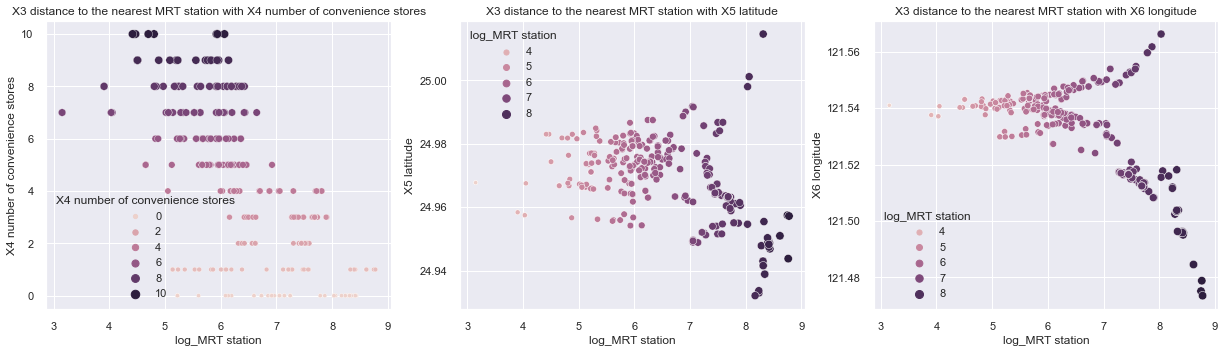

In [81]:
sns.set(rc={"figure.figsize": (21, 18)})

x3 = df["log_MRT station"]
x4 = df["X4 number of convenience stores"]
x5 = df["X5 latitude"]
x6 = df["X6 longitude"]

subplot(3,3,1)
ax = sns.scatterplot(data=df, x=x3, y=x4, hue="X4 number of convenience stores", size="X4 number of convenience stores")
plt.title("X3 distance to the nearest MRT station with X4 number of convenience stores")

subplot(3,3, 2)
ax = sns.scatterplot(data=df, x=x3, y=x5, hue="log_MRT station", size="log_MRT station")
plt.title("X3 distance to the nearest MRT station with X5 latitude")

subplot(3,3,3)
ax = sns.scatterplot(data=df, x=x3, y=x6, hue="log_MRT station", size="log_MRT station")
plt.title("X3 distance to the nearest MRT station with X6 longitude")

plt.show()

In [82]:
#Before transfoming data take copy

rp = df.copy()
rp.head()

,No,X1 transaction date,X2 house age,log_MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,4.441225,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,5.725527,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,6.331474,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,6.331474,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,5.967603,5,24.97937,121.54245,43.1


In [83]:
rp.drop(columns = 'No', axis = 1, inplace=True)
rp.head()

,X1 transaction date,X2 house age,log_MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,4.441225,10,24.98298,121.54024,37.9
1,2012.917,19.5,5.725527,9,24.98034,121.53951,42.2
2,2013.583,13.3,6.331474,5,24.98746,121.54391,47.3
3,2013.500,13.3,6.331474,5,24.98746,121.54391,54.8
4,2012.833,5.0,5.967603,5,24.97937,121.54245,43.1


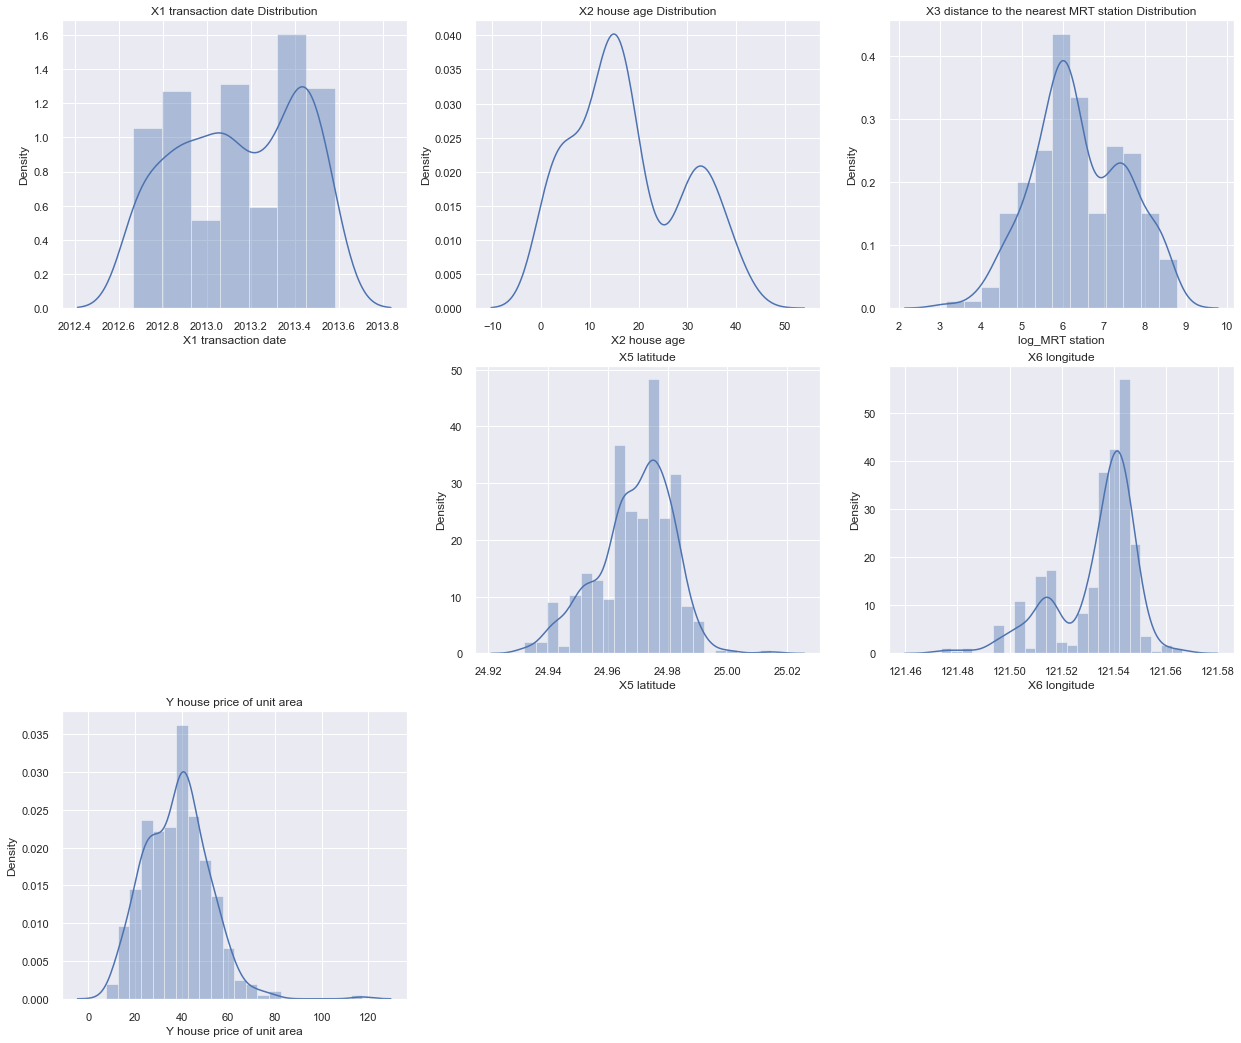

In [84]:
sns.set(rc={"figure.figsize": (21, 18)})
x1 = rp["X1 transaction date"]
x2 = rp["X2 house age"]
x3 = rp["log_MRT station"]
x4 = rp["X4 number of convenience stores"]
x5 = rp["X5 latitude"]
x6 = rp["X6 longitude"]
y = rp["Y house price of unit area"]

subplot(3,3,1)
ax = sns.distplot(x1)
plt.title("X1 transaction date Distribution")

subplot(3,3, 2)
ax = sns.distplot(x2, rug=False, hist=False)
plt.title("X2 house age Distribution")

subplot(3,3,3)
ax = sns.distplot(x3, vertical=False)
plt.title("X3 distance to the nearest MRT station Distribution")

#subplot(3,3,4)
#ax = sns.distplot(x4, color="b")
#plt.title("X4 number of convenience stores Distribution")

subplot(3,3,5)
ax = sns.distplot(x5, color="b")
plt.title("X5 latitude")

subplot(3,3,6)
ax = sns.distplot(x6, color="b")
plt.title("X6 longitude")

subplot(3, 3, 7)
ax = sns.distplot(y, color="b")
plt.title("Y house price of unit area")

plt.show()

### Splitting independent & target:

In [85]:
X = rp.drop(columns = 'Y house price of unit area', axis = 1)
Y = rp["Y house price of unit area"]
print(X,Y)


     X1 transaction date  X2 house age  log_MRT station  \
0               2012.917          32.0         4.441225   
1               2012.917          19.5         5.725527   
2               2013.583          13.3         6.331474   
3               2013.500          13.3         6.331474   
4               2012.833           5.0         5.967603   
..                   ...           ...              ...   
409             2013.000          13.7         8.314346   
410             2012.667           5.6         4.504864   
411             2013.250          18.8         5.968630   
412             2013.000           8.1         4.652150   
413             2013.500           6.5         4.504864   

     X4 number of convenience stores  X5 latitude  X6 longitude  
0                                 10     24.98298     121.54024  
1                                  9     24.98034     121.53951  
2                                  5     24.98746     121.54391  
3                          

### Splitting data to train & test

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)
print(X.shape, X_train.shape, Y_test.shape)

(414, 6) (331, 6) (83,)


### Scaling the data

In [87]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test= scaler.fit_transform(X_test)

### Model building

In [88]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
predictions_lr = lr.predict(X_test)
mse = mean_squared_error(Y_test, predictions_lr)
print("Mean square error with linear regressor :",mse)
rmse = sqrt(mse)
print("Root Mean square error with linear regressor:",rmse)
mae = mean_absolute_error(Y_test, predictions_lr)
print("Mean absolute error with linear regressor :",mae)
r2_score = r2_score(Y_test, predictions_lr)
print("r2_score with linear regressor :", r2_score)

Mean square error with linear regressor : 39.692475877747555
Root Mean square error with linear regressor: 6.30019649516962
Mean absolute error with linear regressor : 4.979612927825698
r2_score with linear regressor : 0.7384972132832959


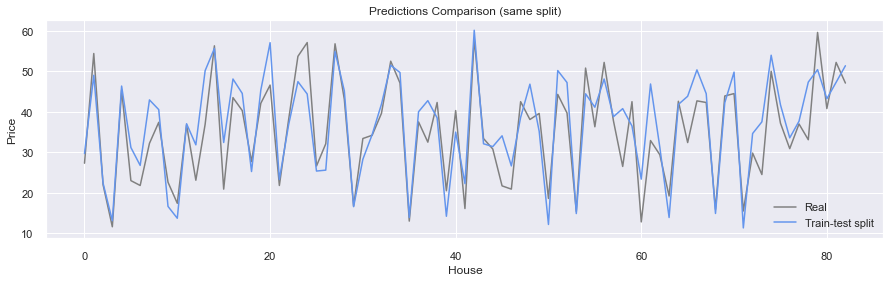

Euclidean distance between prices
- Real vs train-test: 57.398


In [89]:
#Predictions comparison plot
plt.figure(figsize=(15,4))

plt.plot(np.array(Y_test), color='grey', label='Real')
plt.plot(predictions_lr, color='cornflowerblue', label='Train-test split')
plt.xlabel('House')
plt.ylabel('Price')
plt.title('Predictions Comparison (same split)')
plt.legend(loc=4)
plt.show()


#Predictions distance (in general)
print('Euclidean distance between prices')
print('- Real vs train-test: %.3f' % distance.euclidean(Y_test, predictions_lr))


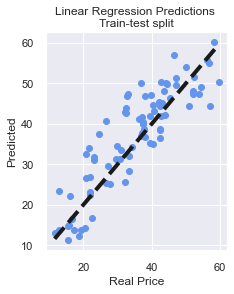

In [90]:
#Predictions plot
plt.figure(figsize=(11, 4))

def plot_regression(real, predicted, color, title):
  plt.scatter(real, predicted, color=color)
  plt.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=4)
  plt.xlabel('Real Price')
  plt.ylabel('Predicted')
  plt.title(title)


#Real price vs train-test predictions plot (without outliers)
plt.subplot(131)
plot_regression(Y_test, predictions_lr, 'cornflowerblue', 'Linear Regression Predictions \nTrain-test split')
plt.show()

In [91]:
#normality Shapiro-Wilk test function
def normality_test(data):
  stat, p_value = shapiro(data)    #Shapiro-Wilk test
  alpha = 0.05

  if p_value > alpha:
    print('Normality test: Gaussian')  #fail in reject H0 (null hypothesis H0: follow normal distribution)
  else:
    print('Normality test: Non Gaussian') #reject H0 (alternative hypothesis H1: does not follow normal distribution)


In [92]:
residuals = Y_test, predictions_lr

print('Assumption of normality in residuals')
normality_test(residuals)

Assumption of normality in residuals
Normality test: Non Gaussian


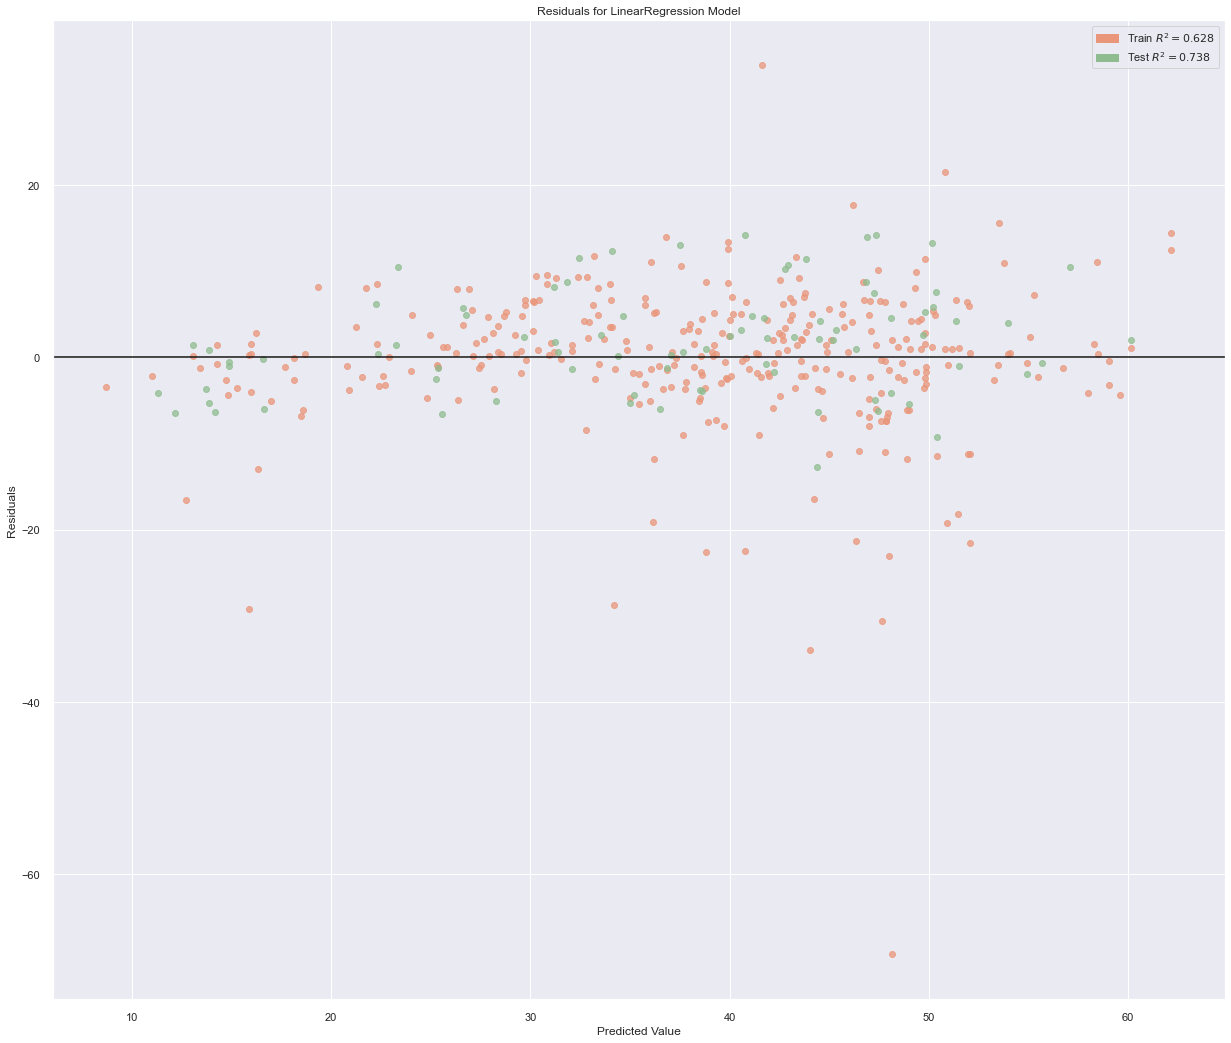

In [93]:
visualizer = ResidualsPlot(LinearRegression(), hist=False, train_color='darksalmon', test_color='darkseagreen')
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof(); 

In [94]:
# Calculate the absolute errors using random forest model
errors = abs(predictions_lr - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.98 degrees.
Accuracy: 83.38 %.


In [95]:
#cross checking model predictions prices with actual prices
cr_pr_lr = pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_lr})
cr_pr_lr

,Actual,Predicted
388,27.3,29.682932
102,54.4,49.013363
187,22.0,22.373466
162,11.6,13.090934
90,45.4,46.358395
...,...,...
322,33.1,47.337028
119,59.6,50.408287
245,40.8,43.226722
146,52.2,47.290939


In [96]:
cr_pr_lr.corr()

,Actual,Predicted
Actual,1.00000,0.88087
Predicted,0.88087,1.00000


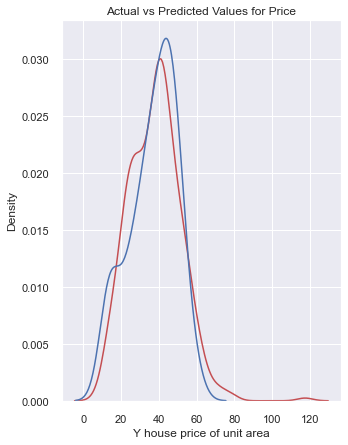

In [97]:
#Let’s plot the difference between the actual and the predicted value.
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(predictions_lr, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Price')


plt.show()
plt.close()

**I guess model did good job in predictions we got 83.38% accuracy, but lets see the detail report of our model**

In [98]:
import statsmodels.api as sm
add_constant = sm.add_constant(X)
add_constant

,const,X1 transaction date,X2 house age,log_MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1.0,2012.917,32.0,4.441225,10,24.98298,121.54024
1,1.0,2012.917,19.5,5.725527,9,24.98034,121.53951
2,1.0,2013.583,13.3,6.331474,5,24.98746,121.54391
3,1.0,2013.500,13.3,6.331474,5,24.98746,121.54391
4,1.0,2012.833,5.0,5.967603,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,1.0,2013.000,13.7,8.314346,0,24.94155,121.50381
410,1.0,2012.667,5.6,4.504864,9,24.97433,121.54310
411,1.0,2013.250,18.8,5.968630,7,24.97923,121.53986
412,1.0,2013.000,8.1,4.652150,5,24.96674,121.54067


In [99]:
## fit a OLS model with intercept on TV and Radio

model= sm.OLS(Y, add_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.653
Model:                                    OLS   Adj. R-squared:                  0.647
Method:                         Least Squares   F-statistic:                     127.4
Date:                        Tue, 20 Jul 2021   Prob (F-statistic):           3.33e-90
Time:                                22:04:43   Log-Likelihood:                -1448.9
No. Observations:                         414   AIC:                             2912.
Df Residuals:                             407   BIC:                             2940.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -2.24e+04   4971.393     -4.506      0.000   -3.22e+04   -1.26e+04
X1 transaction date                 6.5454      1.428      4.582      0.000       3.737       9.354
X2 house age                       -0.2304      0.035     -6.511      0.000      -0.300      -0.161
log_MRT station                    -6.6751      0.587    -11.365      0.000      -7.830      -5.521
X4 number of convenience stores     0.3646      0.191      1.905      0.058      -0.012       0.741
X5 latitude                       282.3115     37.525      7.523      0.000     208.544     356.079
X6 longitude                       18.5738     34.609      0.537      0.592     -49.461      86.608
==============================================================================
Omnibus:                      257.946   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5050.339
Skew:                           2.270   Prob(JB):                         0.00
Kurtosis:                      19.498   Cond. No.                     2.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By looking the summary r-square value is little bit low (0.653) and  followed adjusted r-square is 0.647. which is there little differnece btw them that indiactes that we have relevant features in the data. Just because a model a has a low R-Squared does not mean it is a bad model. R-Squared is often said to measure the goodness of fit of a regression line.

Coming to coefficient, std err, t and p values, we can drop the features which is having -coeff value and if p > 0.05 that particular feature is irrevalant to the model, we can drop that feature too...

As of now model is perfomed well so I'm not gonna drop any feature from the data but will tune(hyper parameter tuing) the model to increase the perfomance. So lets see..

#### Cross Validation

In [102]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = lr, X = X, y = Y, cv = 5)

# Predicting R2 Score the Train set results
y_pred_linear_train = lr.predict(X_train)
r2_score_linear_train = r2_score(Y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lr.predict(X_test)
r2_score_linear_test = r2_score(Y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6558606090201314
R2_score (train):  0.6278314692378782
R2_score (test):  0.7384972132832959
RMSE:  6.30019649516962


#### Polynomial Regression - 2nd degree

In [106]:
# Creating the polynomial features and regressor
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_train_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly, Y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_train_poly, Y_train)

LinearRegression()

In [107]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_poly, y = Y, cv = 5)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(Y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(Y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(Y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  -0.1587716872129664
R2_score (train):  0.7004061253950857
R2_score (test):  0.7534374002155875
RMSE:  6.117578268424349


#### Ridge Regression 

In [109]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [112]:
from sklearn.model_selection import GridSearchCV
parameters =  {  'model__alpha' : [43, ],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42] 
}
regressor_ridge = GridSearchCV(ridge_pipe, parameters,cv=5)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

In [113]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.6874803659861846
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [114]:
# Predicting Cross Validation Score the Test set results
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score the Test set results
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(Y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(Y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(Y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.6874803659861846
R2_score (train):  0.6804905587251746
R2_score (test):  0.8139632417760663
RMSE:  5.31392371676255


#### Lasso Regression 

In [115]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [119]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:np.arange(0.01, 1, 0.005) -> 0.9949

parameters =  {  'model__alpha' : [0.9949],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__max_iter' : [5000],
                'model__random_state': [42] 
}
regressor_lasso = GridSearchCV(lasso_pipe, parameters,cv=5, n_jobs = -1, verbose = 4)
regressor_lasso = regressor_lasso.fit(X, y.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [120]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_

# Predicting R2 Score the Test set results
y_pred_lasso_train = regressor_lasso.predict(X_train)
r2_score_lasso_train = r2_score(Y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = regressor_lasso.predict(X_test)
r2_score_lasso_test = r2_score(Y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(Y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.6454716266299789
R2_score (train):  0.6175622654345025
R2_score (test):  0.7504422984784591
RMSE:  6.154622534460901


#### Measuring the Error 

In [121]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean())]

In [122]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,6.300196,0.627831,0.738497,0.655861
1,Polynomial Regression (2nd),6.117578,0.700406,0.753437,-0.158772
2,Ridge Regression,5.313924,0.680491,0.813963,0.687480
3,Lasso Regression,6.154623,0.617562,0.750442,0.645472


#### Visualizing Models Performance 

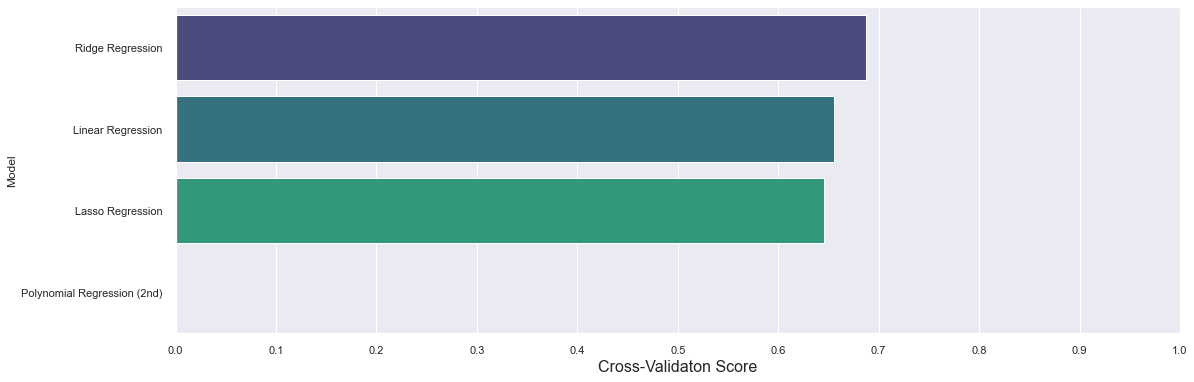

In [126]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

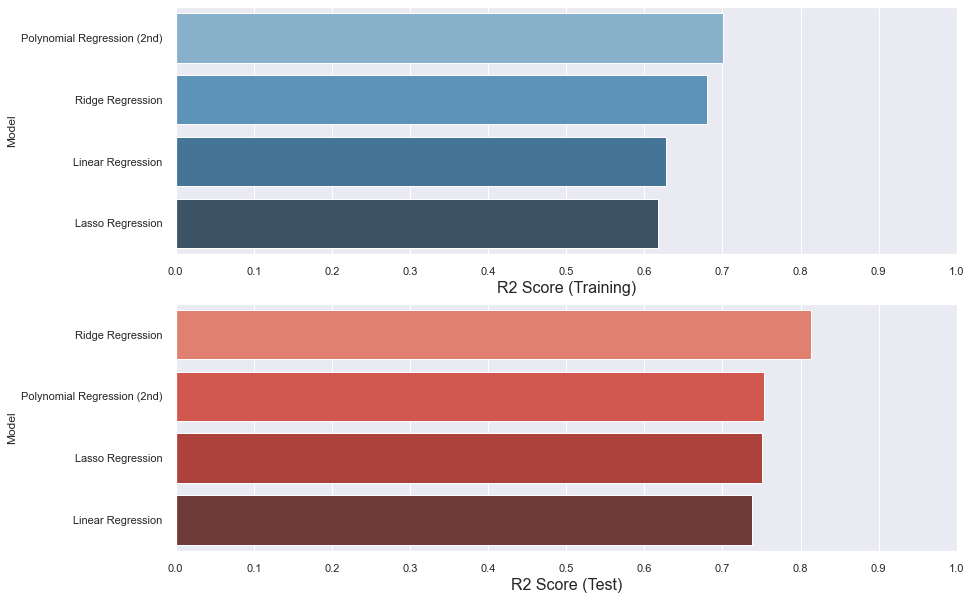

In [124]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

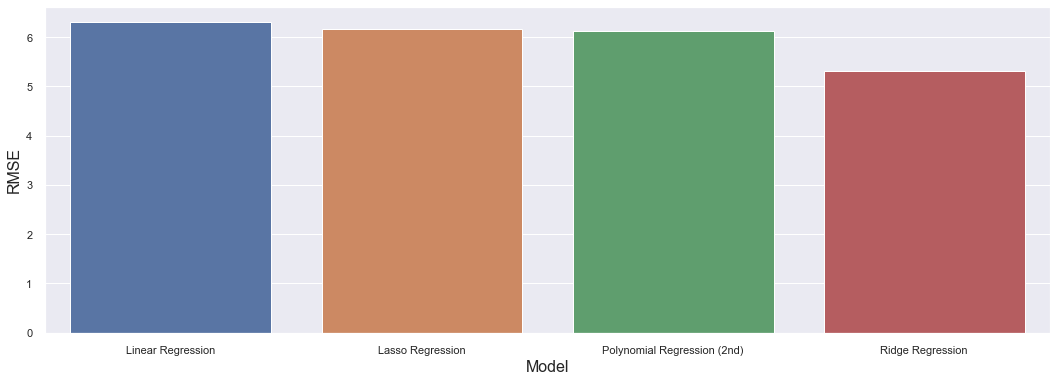

In [125]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()